<a href="https://www.kaggle.com/code/garysuen/cylistic-bike-share-case-study?scriptVersionId=112941210" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Introduction

Hi everyone,  My name is Gary and this is my google data analytics capstone project - case study 1. 

I will be using the ask - prepare - process - analyze - share - act approach with python in this case study

# Background

    **Scenario**
    
    You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
    of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
    your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
    your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
    must approve your recommendations, so they must be backed up with compelling data insights and professional data
    visualizations
    
Full case study details may refer to [Google Data Analytics Capstone: Complete a Case Study](https://www.coursera.org/learn/google-data-analytics-capstone)

# Ask

This analysiss include the below deliverables

* Business Task : Design marketing strategies aimed at converting casual riders into annual members
* Question to be analyzed in this analysis: How to annual memebrs and casual riders use Cyclistic bikes differently ?
* Description of all data sources used
* Summary of the analysis
* Visualizations and findings
* Recommendations based on the analysis


# Prepare

### Inputing data

In [2]:
"""Define Function to generate list of string in the form of YYMM from start(variable) to end(variable) """
def monthgen (start,end):
    list=[]
    s,e = int(start),int(end)
    list.append(str(s))
    while (s) != (e):
        if s%100 == 12 :
            s = s - 11 + 100
        else:
            s = s + 1
        list.append(str(s))
    return list

'''read all data in the data range, return a list contain all set of data '''
def readmdata(datarange): #reading multiple data
    list=[]
    for i in range(len(datarange)):
        mdata=pd.read_csv('../input/cylistic-bike-share-202110-to-202209/20{}-divvy-tripdata.csv'.format(datarange[i]))
        list.append(mdata)
    return list

"""Applying the function created to input data"""
s,e = '2110','2209' #define data range
drange = monthgen(s,e) #generate a contain all 'YYYYMM' value from 2110 to 2209
data = readmdata(drange) #using function created to read multiple data
data_c = pd.concat(data,ignore_index=True) # combining data into one dataframe

## About the datasets

### Data Source
In this scenario, the datasets come from a fictional company which Cyclistic so data is reliable and original 

### Data licensing
These datasets are public data and has been made available by Motivate international Inc. under [this license](https://ride.divvybikes.com/data-license-agreement)

### Privacy
These datasets does not contain personal information about the riders 

### Data Range
Previously 12 months of Cyclistic trip data(From:01-Oct-2021,To:31-Sep-2022)

### Data Description
This dataset is 

* **Reliable** , **Original** and **Cited** as this is a first party data which include the entire population of ride data 
* **Comprehensive** as this data set include the information for casual/member ride which can be used to answer the question
* **Current** as we have the last 12 months data

**This dataset  is ROCCC (Reliable,Original,Comprehensive,Current and Cited)**




# Process

## Data integrity

### Check for consistency of columns name and data type
All the 12 files have the same columns and same data type for each columns as checked in the below

True refer the all the data have same columns and same data type , False mean some of the columns or data type may not be consistent.


In [3]:
def check_data(data):
    check=0
    """Confirming all the data have the same columns"""
    for i in range(len(data)):
        #Confirming all the data have the same columns
        check += (data[0].columns != data[i].columns).sum() 
        #Confirming all the data have the same data type for each column
        check += (data[0].dtypes != data[i].dtypes).sum()
    return True if check ==0 else False    

check_data(data)

True

### Columns Name

In [4]:
data_c.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

### Check for data's shape

In [5]:
data_c.shape

(5828235, 13)

### Check for any null value

In [6]:
data_c.isnull().sum() # null value count for each columns

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    895032
start_station_id      895032
end_station_name      958227
end_station_id        958227
start_lat                  0
start_lng                  0
end_lat                 5844
end_lng                 5844
member_casual              0
dtype: int64

### Transforming data for analysis
Creating new columns from existing data for analysis

In [7]:
data_c["started_atx"]=pd.to_datetime(data_c["started_at"]) #change type from string to datetime
data_c["ended_atx"]=pd.to_datetime(data_c["ended_at"]) #change type from string to datetime
data_c["ride_length"] = (data_c["ended_atx"]-data_c["started_atx"]).astype('timedelta64[m]') #get the timediff in mintues
data_c["weekday"] = data_c["started_atx"].dt.day_name() # get weekday
data_c["time"]=data_c["started_atx"].dt.time # get time
data_c["hour"] = data_c["started_atx"].dt.hour # get starting hour 
data_c["ride_length_in_hour"] = (data_c["ended_atx"]-data_c["started_atx"]).astype('timedelta64[h]') #get the timediff in hour
data_c["month"]=data_c['started_atx'].dt.month # get month
data_c["year"]=data_c['started_atx'].dt.year # get month
data_c['year_month']=data_c['year'].astype('str')+'_'+data_c['month'].astype('str') # get year month

### Choosing only the data needed for the analysis
For this analysis , it will focus on the exploring the difference between casual riders and members riders in terms of ride time , bike type and ride length.

The location data will be dropped in this analysis

In [8]:
data_to_use = data_c[['rideable_type','member_casual', 'started_atx', 'ended_atx', 'ride_length', 'weekday',
       'time', 'hour', 'ride_length_in_hour', 'month','year','year_month']]

### Getting Descriptive data for ride length

While mean and 3rd quartile of ride_length are 19 mintues and 18 mintues only ,the max of ride length is >40000 mintues (667 hrs) which have a very large difference with the mean/ the majority (at least other 75%) of ride 

Actually, **99% of ride are with ride length less than or equal to 108 mintues**.

In this case study, **we will focus on the data for these 99% of ride with ride length less than 108 mintues .**

Note that this does not mean these data are not important, in fact with this data we may have further study what is the difference between these long ride time usual comapre to normal user.

However, the aim for this case study is to convert casual user to member user as much as possbile, so this analysis will focus on the 99% of ride with ride length less than 108 mintues to reduce noise.

Also, data with negative ride length will also be moved as it is impossilbe to have negative ride length

In [9]:
# Get Descriptive Data
data_to_use['ride_length'].describe()

count    5.828235e+06
mean     1.911273e+01
std      1.698867e+02
min     -1.035400e+04
25%      5.000000e+00
50%      1.000000e+01
75%      1.800000e+01
max      4.070500e+04
Name: ride_length, dtype: float64

**99% of ride are with ride length less than or equal to 108 mintues**

In [10]:
data_to_use['ride_length'].quantile(q=0.99) #99% quantile of ride_length

108.0

#### Trimming data with ride length less than 108 mintues(99% quantile) / negative ride length

In [11]:
#Removed ended time faster than started time data(potenially data error) & the 1% outliner with riding time > 108 mintues
data_to_use= data_to_use[(data_to_use['ride_length'] > 0 )&(data_to_use['ride_length'] <= data_to_use['ride_length'].quantile(q=0.99))]

# Analyze

In this analysis , the following will relationship will be investigated to find out if there is any difference between casual/member
* Distribution of ride across 24 hours
* Distriubtion of ride across weekday
* Distribution of ride in the previous 12 month
* Distribution of rideable type
* Ride length trend for casual and member ride

## Summary of findings
* Number of Ride
   * Across 24 hours
       * Member - higher proportion of member ride in 06:00-09:59
       * Casual - similar / slightly higher proportion for casual ride in time other than 06:00-09:59
   * Across weekday 
       * Member - Roughly evenly distributed across weekday
       * Casual - More ride in weekend (Saturday and Sunday) compare to weekday (Monday-Friday)
   * Across month - Overall , More Ride occur in May-October then November - April
       * Member - less variation ,69.3% of ride occur in May-October , 30.7% of ride occur November - April
       * Casual - Higher variation, 81.9% of ride occur in May-October , 18.1% of ride occur in November - April
   * Between rideable type
       * Member - More ride in classic bike(52.8%) than electric bike(47.2%) , no ride with docked bike
       * Casual - More ride in electric bike(53.3%) than classic bike(37.4%) , a few percent ride with docked bike(7.3%)
* Ride length
    * Average - Average of Casual ride is 8 mintues longer then average of member ride
    * Variation - Casual ride have a larger standard deviation compare to member ride
    * Across weekday - Average ride length for weekend(saturday,sunday) is longer than weekday(monday - friday) 
    * Across month - 
        * Member - Difference between overall average and monthly average below 2 mintues , with ride length average in May-September larger than average, average in October close to average , others month less than average
        * Casual - Maximum difference between overall average and monthly average up to 4.1 mintues, with ride length average in March-July (>1%) larger than average, average in Auguest-October close to overall average , others month less than overall average




## Distribution of ride across 24 hours
### Findings

* Member - higher proportion of member ride in 06:00-09:59
* Casual - similar / slightly higher proportion for casual ride in time other than 06:00-09:59

### Visual

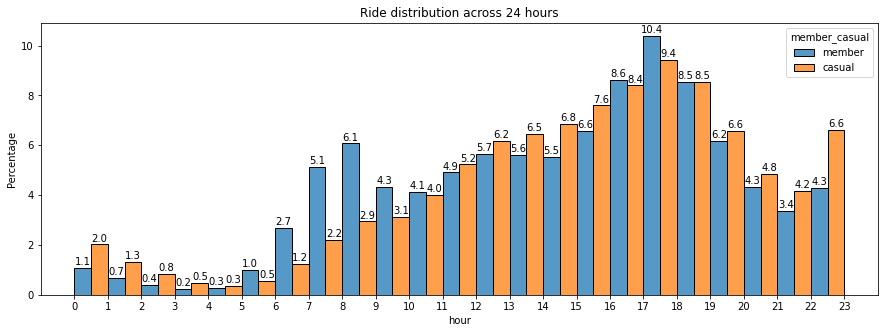

In [12]:
fig2 , ax2 = plt.subplots(figsize = (15,5))
ax2 = sns.histplot(data = data_to_use,x="hour",hue="member_casual",multiple="dodge",stat='percent',ax=ax2 , common_norm = False , binwidth = 1)
ax2.set(title ="Ride distribution across 24 hours",
        ylabel = 'Percentage',
        xlim=(-1, 24),
        xticks=(np.arange(0,24,1))
       )
for c in ax2.containers:
    # set the bar label
    ax2.bar_label(c, fmt='%.1f', label_type='edge', padding=1)

## Distribution of ride across weekdays
### Findings
* Member ride are roughly evenly distributed across weekday
* Casual ride are have a higher proportion in saturday(20.7%) and sunday(16.8%), compare to Monday-Friday which range from 11.5%(Tuesday) to 14.7% (Friday)

### Visual

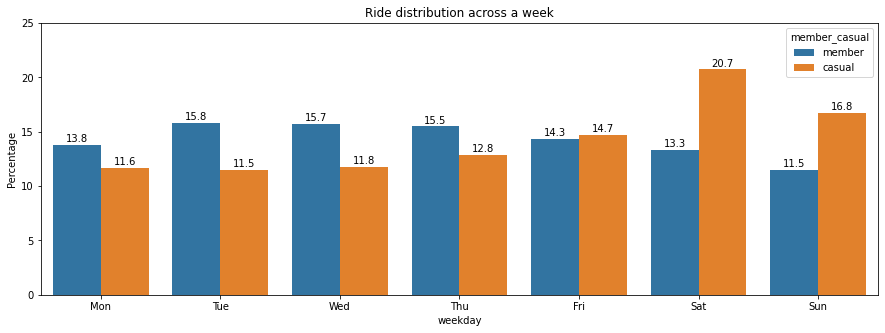

In [13]:
wd_u_data = data_to_use.groupby('weekday')["member_casual"].value_counts().unstack().apply(lambda x: x/np.sum(x),0) # grounby weekday and count the number of member vs casual
wd_u_data = wd_u_data.reset_index() # trasnferring index weekday to column by resetting index
wd_u_data = wd_u_data.melt('weekday',['casual','member']) #melt for data suitable to plot charge
wd_u_data['value'] = wd_u_data['value']*100 #*100 to be percentage
weekdayorder = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] # list for weekday in order
short_order_weekday=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'] # list for short form for week day ub irder
fig , ax = plt.subplots(figsize = (15,5))
sns.barplot(data = wd_u_data, x = 'weekday', y = 'value',hue = 'member_casual',order = weekdayorder,hue_order=['member','casual'] , ax=ax)
ax.set (title ="Ride distribution across a week",
       xticklabels = short_order_weekday,
       ylabel = 'Percentage',
       ylim = (0,25)
       )
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%.1f', label_type='edge', padding=1)

## Distribution of ride in last 12 months
### Findings
* Overall , More Ride occur in May-October then November - April
* Member ride have less variation across last 12 months,69.3% of ride occur in May-October , 30.7% of ride occur November - April
* Casual ride have higher variation across last 12 months, 81.9% of ride occur in May-October , 18.1% of ride occur in November - April

### Visual

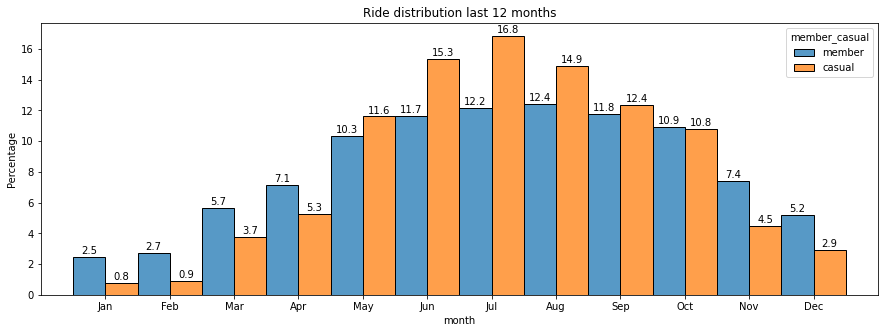

In [14]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig3 , ax3 = plt.subplots(figsize = (15,5))
ax3 = sns.histplot(data = data_to_use,x="month",hue="member_casual",multiple="dodge",stat='percent',discrete=True , ax=ax3 , common_norm = False)
ax3.set(title ="Ride distribution last 12 months",
        ylabel = 'Percentage',
        xlim=(0, 13),
        xticks=(np.arange(1,13,1)),
        xticklabels=months
       )
for c in ax3.containers:
    # set the bar label
    ax3.bar_label(c, fmt='%.1f', label_type='edge', padding=1)

## Distribution of rideable type
### Findings

* Member - More ride in classic bike(52.8%) than electric bike(47.2%) , no ride with docked bike
* Casual - More ride in electric bike(53.3%) than classic bike(37.4%) , a few percent ride with docked bike(7.3%)

### Visual

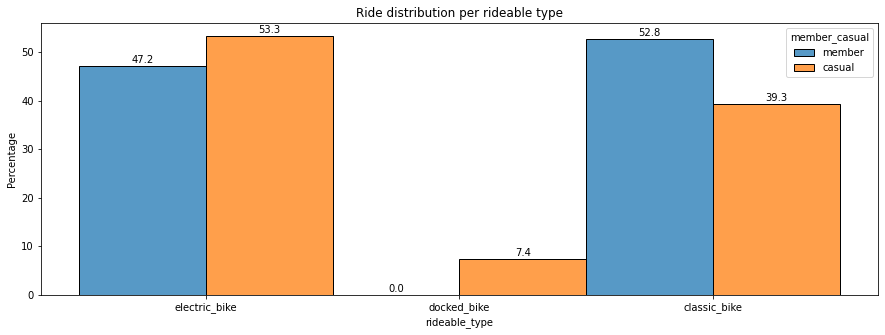

In [15]:
fig4 , ax4 = plt.subplots(figsize = (15,5))
ax4 = sns.histplot(data = data_to_use,x="rideable_type",hue="member_casual",multiple="dodge",stat='percent',discrete=True , ax=ax4 , common_norm = False)
ax4.set(title ="Ride distribution per rideable type",
        ylabel = 'Percentage',
       )
for c in ax4.containers:
    # set the bar label
    ax4.bar_label(c, fmt='%.1f', label_type='edge', padding=1)

## Ride length trend for casual and member ride
### Findings
* Casual ride generally have a longer ride length compare to member ride as casual ride showing a larger mean and median
* Average of Casual ride is 8 mintues longer then average of member ride
* Casual ride have a larger standard deviation compare to member ride
* Average ride length for weekend is longer than ride length for weekday
* Across month - 
    * Member - Difference between overall average and monthly average below 2 mintues , with ride length average in May-September larger than average, average in October close to average , others month less than average
    * Casual - Maximum difference between overall average and monthly average up to 4.1 mintues, with ride length average in March-July (>1%) larger than average, average in Auguest-October close to overall average , others month less than overall average

### Getting descrptive data
Note that the data used is the cleaned data which filtered out the 1% highest ride_length data

In [16]:
# descriptive data of member/casual ride
(data_to_use[data_to_use['member_casual'] == 'member']['ride_length'].describe(),data_to_use[data_to_use['member_casual'] == 'casual']['ride_length'].describe()) 

(count    3.349788e+06
 mean     1.171667e+01
 std      1.038572e+01
 min      1.000000e+00
 25%      5.000000e+00
 50%      9.000000e+00
 75%      1.500000e+01
 max      1.080000e+02
 Name: ride_length, dtype: float64,
 count    2.305767e+06
 mean     1.881883e+01
 std      1.780048e+01
 min      1.000000e+00
 25%      7.000000e+00
 50%      1.300000e+01
 75%      2.300000e+01
 max      1.080000e+02
 Name: ride_length, dtype: float64)

### Visual

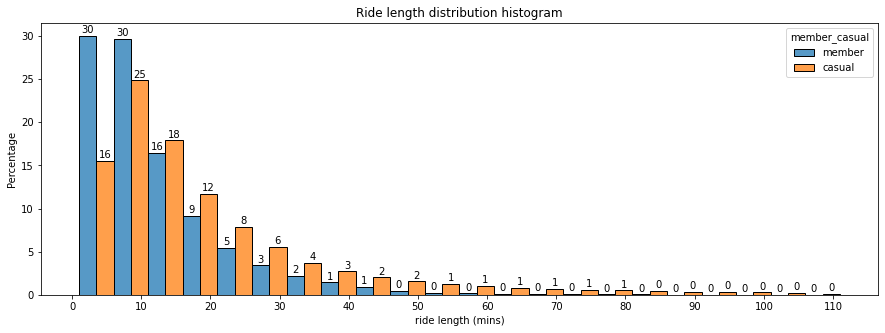

In [17]:
fig6 , ax6 = plt.subplots(figsize=(15,5))
ax6 = sns.histplot(data = data_to_use ,x="ride_length",hue="member_casual",multiple="dodge",stat='percent',binwidth = 5, ax=ax6 , common_norm = False)
ax6.set(title ="Ride length distribution histogram",
        xlabel = 'ride length (mins)',
        ylabel = 'Percentage',
        xticks=(np.arange(0,120,10))
       )

for c in ax6.containers:
    # set the bar label
    ax6.bar_label(c, fmt='%.0f', label_type='edge', padding=1)

### Ride length mean difference across a week

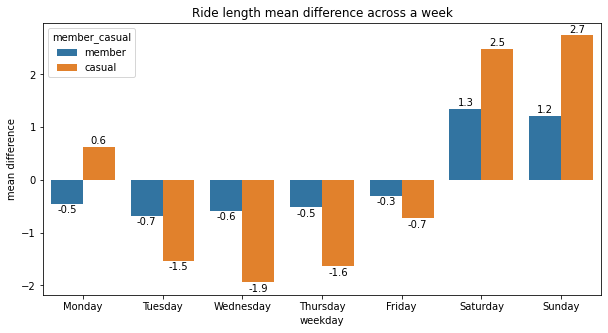

In [18]:
wddict = { 
    "Monday" : 0,
    "Tuesday" : 1,
    "Wednesday" : 2,
    "Thursday" :3,
    "Friday" :4,
    "Saturday" :5,
    "Sunday" :6
         }
rl_wd = data_to_use.groupby(['member_casual','weekday'])['ride_length'].mean().unstack().apply(lambda x: x-np.mean(x),1).reset_index().melt(id_vars='member_casual')
rl_wd['day_id'] = rl_wd['weekday'].map(wddict)
rl_wd = rl_wd.sort_values(by='day_id',ignore_index = True)
rl_wd = rl_wd.drop('day_id' , axis=1)
fig7 , ax7 = plt.subplots(figsize=(10,5))
sns.barplot(data = rl_wd , x = 'weekday' , y= 'value' , hue = 'member_casual' ,ax = ax7,hue_order=['member','casual'])
ax7.set(title ="Ride length mean difference across a week",
        ylabel = 'mean difference',
       )
for c in ax7.containers:
    # set the bar label
    ax7.bar_label(c, fmt='%.1f', label_type='edge', padding=1)

### Ride length mean difference across 12 months

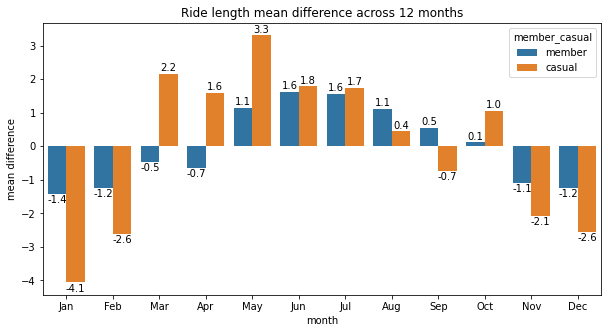

In [19]:
rl_m = data_to_use.groupby(['member_casual','month'])['ride_length'].mean().unstack().apply(lambda x: x-np.mean(x),1).reset_index().melt(id_vars='member_casual')
fig8 , ax8 = plt.subplots(figsize=(10,5))
sns.barplot(data = rl_m , x = 'month' , y= 'value' , hue = 'member_casual' ,ax = ax8,hue_order=['member','casual'])
ax8.set(title ="Ride length mean difference across 12 months",
        ylabel = 'mean difference',
        xticklabels = months
       )
for c in ax8.containers:
    # set the bar label
    ax8.bar_label(c, fmt='%.1f', label_type='edge', padding=1)

# Share

Recall the question that we are trying to solve in this analysis are

#### How to annual memebrs and casual riders use Cyclistic bikes differently ?

With this analysis , we have identiyied a few key difference for the use of Cyclistic bike between member and casual riders as

#### 1. Casual Rider,compare to member rider, have a higher proportion ride in weekend 

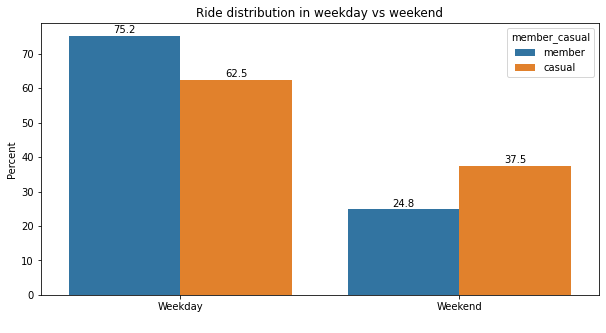

In [20]:
wday_vs_wend = data_to_use.groupby("member_casual")['weekday'].value_counts().unstack().apply(lambda x: x/np.sum(x),1).reset_index().melt(id_vars='member_casual')
wday_vs_wend['wday_vs_wend'] = wday_vs_wend['weekday'].map( { 
    'Monday' : "Weekday",
    'Tuesday' : "Weekday",
    'Wednesday' : "Weekday",
    'Thursday' : "Weekday",
    'Friday' : "Weekday",
    'Saturday' : "Weekend",
    'Sunday' : "Weekend",
    })
wday_vs_wend['value'] = wday_vs_wend['value']*100
wday_vs_wend = wday_vs_wend.groupby(['wday_vs_wend','member_casual'])['value'].sum().unstack().reset_index().melt(id_vars='wday_vs_wend')
wday_vs_wend['value'] = wday_vs_wend['value'].round(1)
fig9 , ax9 = plt.subplots(figsize=(10,5))
sns.barplot(data = wday_vs_wend , x = 'wday_vs_wend' , y= 'value' , hue = 'member_casual' ,ax = ax9,hue_order=['member','casual'])
ax9.set(title ="Ride distribution in weekday vs weekend",
        ylabel = 'Percent',
        xlabel = ' '
       )
for c in ax9.containers:
    # set the bar label
    ax9.bar_label(c, fmt='%.1f', label_type='edge', padding=1)

#### 2. Casual ride concentrated at May-Oct, with 81.9% of casual ride occur in May-October in last 12 month

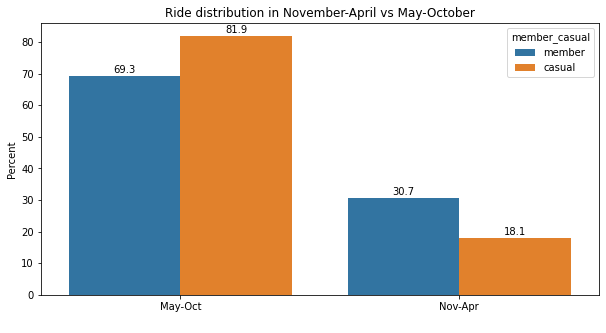

In [21]:
monthcom = data_to_use.groupby("member_casual")['month'].value_counts().unstack().apply(lambda x: x/np.sum(x),1).reset_index().melt(id_vars='member_casual')
monthcom['Period'] = monthcom['month'].map(lambda x: 'May-Oct'  if (x >= 5) & (x <= 10) else 'Nov-Apr' )
monthcom['value'] = monthcom['value']*100
monthcom = monthcom.groupby(['Period','member_casual'])['value'].sum().unstack().reset_index().melt(id_vars='Period')
monthcom['value'] = monthcom['value'].round(1)
fig10 , ax10 = plt.subplots(figsize=(10,5))
sns.barplot(data = monthcom , x = 'Period' , y= 'value' , hue = 'member_casual' ,ax = ax10,hue_order=['member','casual'])
ax10.set(title ="Ride distribution in November-April vs May-October",
        ylabel = 'Percent',
        xlabel = ' '
       )
for c in ax10.containers:
    # set the bar label
    ax10.bar_label(c, fmt='%.1f', label_type='edge', padding=1)

#### 3. Casual Rider tend to have longer ride length
* Average ride length of casual ride(19 mintues) is 7 mintues longer than average ride length of member ride(12 mintues)
* Casual rider have a higher tendency to ride for longer time
* Both casual and member rider generally ride longer at weekend(Saturday,Sunday) compare to weekday(Monday -  Friday)
* Casual member tend to ride longer in March - July while shorter in November - February

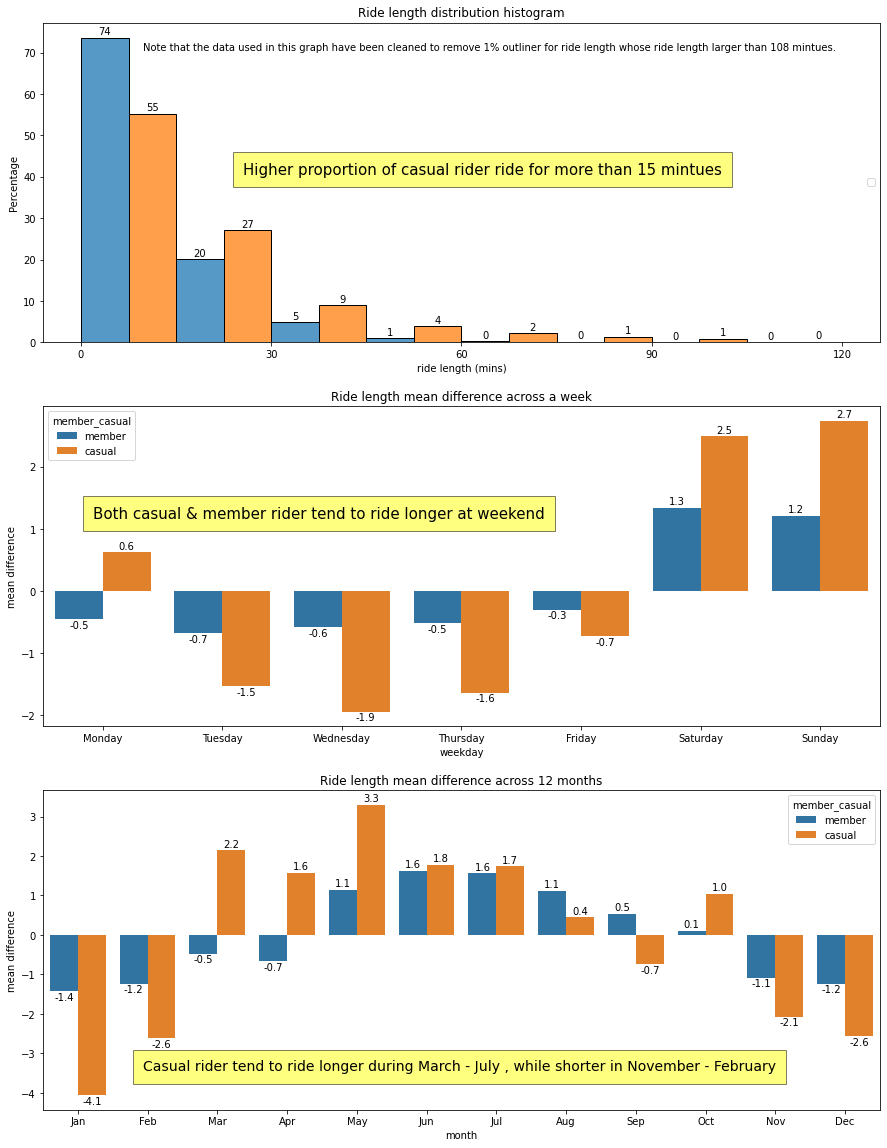

In [22]:
fig10 , ax10 = plt.subplots(3,1 , figsize= (15,20)) # creating figure for two graph

"""Ploting graph 1"""
sns.histplot(data = data_to_use ,x="ride_length",hue="member_casual",multiple="dodge",stat='percent',binrange = (0,120),binwidth = 15, ax=ax10[0] , common_norm = False)
ax10[0].set(title ="Ride length distribution histogram",
        xlabel = 'ride length (mins)',
        ylabel = 'Percentage',
        xticks=(np.arange(0,150,30))
       )

# add label
for c in ax10[0].containers:
    # set the bar label
    ax10[0].bar_label(c, fmt='%.0f', label_type='edge', padding=1)

#config legend location
ax10[0].legend(loc = "center right")

#adding text
text1 = 'Note that the data used in this graph have been cleaned to remove 1% outliner for ride length whose ride length larger than 108 mintues.'
text2 = 'Higher proportion of casual rider ride for more than 15 mintues'
ax10[0].annotate(text1,(0,0),(100,300),xycoords = 'axes fraction',
                 textcoords = 'offset points', va='top',wrap=True
                )
ax10[0].annotate(text2,(0,0),(200,180),xycoords = 'axes fraction',
                 textcoords = 'offset points', va='top',fontsize = 15,
                 bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10}
                )

"""Ploting graph 2"""
sns.barplot(data = rl_wd , x = 'weekday' , y= 'value' , hue = 'member_casual' ,ax = ax10[1],hue_order=['member','casual'])
ax10[1].set(title ="Ride length mean difference across a week",
        ylabel = 'mean difference',
       )
for c in ax10[1].containers:
    # set the bar label
    ax10[1].bar_label(c, fmt='%.1f', label_type='edge', padding=1)
text3 = 'Both casual & member rider tend to ride longer at weekend'
ax10[1].annotate(text3,(0,0),(50,220),xycoords = 'axes fraction',
                 textcoords = 'offset points', va='top',fontsize = 15,
                 bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10},
                 wrap = True
                )
"""Ploting graph 3"""
sns.barplot(data = rl_m , x = 'month' , y= 'value' , hue = 'member_casual' ,ax = ax10[2],hue_order=['member','casual'])
ax10[2].set(title ="Ride length mean difference across 12 months",
        ylabel = 'mean difference',
        xticklabels = months
       )
for c in ax10[2].containers:
    # set the bar label
    ax10[2].bar_label(c, fmt='%.1f', label_type='edge', padding=1)
text4 = "Casual rider tend to ride longer during March - July , while shorter in November - February"
text4ob = ax10[2].annotate(text4,(0,0),(100,50),xycoords = 'axes fraction',
                 textcoords = 'offset points', va='top',fontsize = 14,
                 bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad' : 10},
                 wrap = True,
                )

# Act

**Based on the findings, There are 3 recommendations to attract casual rider to become a member.**
1. A seasonal membership option for rider which mostly ride on May - Octobuer only
2. A weekend membership option for rider which mostly ride on weekend only .This may further combine with the first suggestion to have a seasonal weekend membership option.
3. Promotional offers for ride length extension on membership

## Further discussion

This case study have not include the information for fee for casual ride/member ride and its relationship with ride length.

With the fee information it would help to explore the potenial reasons why a rider would choose casual option over member option if the rider is a
1. Seasonal rider
2. Weekend rider
3. Long trip rider

# This is the end for this case study , Thank you !